<a href="https://colab.research.google.com/github/seher13/PharmaCompanies/blob/main/Pharma_Web_scrapping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [ ]:
import requests
from bs4 import BeautifulSoup
import re

In [ ]:
url = 'https://en.wikipedia.org/wiki/List_of_largest_biomedical_companies_by_revenue'
data = requests.get(url).text

In [ ]:
soup = BeautifulSoup(data, 'html5lib')

In [ ]:
tables = soup.find_all('table', attrs={'class':'sortable wikitable'})

In [ ]:
len(tables)

1

In [ ]:
table = pd.read_html(str(tables))[0]

In [ ]:
table.head()

,Rank,Chg,Company,2020 USD billions,2019USD billions,2018USD billions,2017USD billions,2016USD billions,2015USD billions,2014USD billions,2013USD billions,2012USD billions,2011USD billions
0,1,NaN,Johnson & JohnsonNYSE: JNJ,82.6,82.06[1],81.60[2],76.50[3],71.89[4],70.10[5],74.30[6],71.31[7],67.20[8],65.00[9]
1,2,1.0,SinopharmSEHK: 1099,66.3,60.18[10],48.75[11],43.63[12],36.56[13],32.36[14],28.32[15],23.61[16],19.31[17],14.46[18]
2,3,1.0,RocheSIX: ROG,NaN,63.85[19],56.86[20],57.37[21],50.11[22],47.70[23],49.86[24],48.53[25],47.80[26],45.21[27]
3,4,7.0,PfizerNYSE: PFE,41.9,51.75[28],53.60[29],52.54[30],52.82[31],48.85[32],49.61[33],51.58[34],58.99[35],65.26[36]
4,5,1.0,BayerFWB: BAYN,NaN,48.02 [37],45.06[38],37.94[39],25.27[40],24.09[41],25.47[42],24.17[43],24.30[44],23.11[45]


In [ ]:
table1 = tables[0]

In [ ]:
body = table1.find_all('tr')

In [ ]:
#Head values (column names) are the first items of the body list
head = body[0]
body_rows = body[1:] #All other items becomes rest of the tables

In [ ]:
#for loop

headings = []
for item in head.find_all('th'): #loop through elements
  #convert the th elements to text and strip "\n"
  item = (item.text).rstrip('\n')
  #append the clean column name to headings
  headings.append(item)
headings

['Rank',
 'Chg',
 'Company',
 '2020\nUSD billions',
 '2019USD billions',
 '2018USD billions',
 '2017USD billions',
 '2016USD billions',
 '2015USD billions',
 '2014USD billions',
 '2013USD billions',
 '2012USD billions',
 '2011USD billions']

In [ ]:
all_rows = [] #list for all the rows
for row_num in range(len(body_rows)):
  row = []
  for row_item in body_rows[row_num].find_all('td'): #loop through all row entries
    # row_item.text removes the tags from entries
    # the following regex is to remove \xa0 and \n and comma from row_item_text
    # xa0 encodes the flag, \n is the newline and comma separates thousands in numbers
    aa = re.sub('(\n)|([\[]).*?([\]])','',row_item.text)
    #append aa to row - note one row entry is being appended
    row.append(aa)
  # append one row to all_rows
  all_rows.append(row)


In [ ]:
df = pd.DataFrame(data=all_rows, columns=headings)
df.head()

,Rank,Chg,Company,2020\nUSD billions,2019USD billions,2018USD billions,2017USD billions,2016USD billions,2015USD billions,2014USD billions,2013USD billions,2012USD billions,2011USD billions
0,1,,Johnson & JohnsonNYSE: JNJ,82.6,82.06,81.60,76.50,71.89,70.10,74.30,71.31,67.20,65.00
1,2,1,SinopharmSEHK: 1099,66.3,60.18,48.75,43.63,36.56,32.36,28.32,23.61,19.31,14.46
2,3,1,RocheSIX: ROG,,63.85,56.86,57.37,50.11,47.70,49.86,48.53,47.80,45.21
3,4,7,PfizerNYSE: PFE,41.9,51.75,53.60,52.54,52.82,48.85,49.61,51.58,58.99,65.26
4,5,1,BayerFWB: BAYN,,48.02,45.06,37.94,25.27,24.09,25.47,24.17,24.30,23.11


In [ ]:
#text1 = '82.06[1]'

In [ ]:
#text_clean = re.sub('([\[]).*?([\]])','\g<1>', text1)
#text_clean

In [ ]:
#text_clean = re.sub('([\[]).*?([\]])','\g<1>\g<2>', text1)
#text_clean

In [ ]:
#text_clean = re.sub('([\[]).*?([\]])','', text1)
#text_clean

In [ ]:
table.head()

,Rank,Chg,Company,2020 USD billions,2019USD billions,2018USD billions,2017USD billions,2016USD billions,2015USD billions,2014USD billions,2013USD billions,2012USD billions,2011USD billions
0,1,NaN,Johnson & JohnsonNYSE: JNJ,82.6,82.06[1],81.60[2],76.50[3],71.89[4],70.10[5],74.30[6],71.31[7],67.20[8],65.00[9]
1,2,1.0,SinopharmSEHK: 1099,66.3,60.18[10],48.75[11],43.63[12],36.56[13],32.36[14],28.32[15],23.61[16],19.31[17],14.46[18]
2,3,1.0,RocheSIX: ROG,NaN,63.85[19],56.86[20],57.37[21],50.11[22],47.70[23],49.86[24],48.53[25],47.80[26],45.21[27]
3,4,7.0,PfizerNYSE: PFE,41.9,51.75[28],53.60[29],52.54[30],52.82[31],48.85[32],49.61[33],51.58[34],58.99[35],65.26[36]
4,5,1.0,BayerFWB: BAYN,NaN,48.02 [37],45.06[38],37.94[39],25.27[40],24.09[41],25.47[42],24.17[43],24.30[44],23.11[45]


In [ ]:
table_replace = table.replace({'(\n)|([\[]).*?([\]])':''}, regex=True)

In [ ]:
table_replace.head()

,Rank,Chg,Company,2020 USD billions,2019USD billions,2018USD billions,2017USD billions,2016USD billions,2015USD billions,2014USD billions,2013USD billions,2012USD billions,2011USD billions
0,1,NaN,Johnson & JohnsonNYSE: JNJ,82.6,82.06,81.60,76.50,71.89,70.10,74.30,71.31,67.20,65.00
1,2,1.0,SinopharmSEHK: 1099,66.3,60.18,48.75,43.63,36.56,32.36,28.32,23.61,19.31,14.46
2,3,1.0,RocheSIX: ROG,NaN,63.85,56.86,57.37,50.11,47.70,49.86,48.53,47.80,45.21
3,4,7.0,PfizerNYSE: PFE,41.9,51.75,53.60,52.54,52.82,48.85,49.61,51.58,58.99,65.26
4,5,1.0,BayerFWB: BAYN,NaN,48.02,45.06,37.94,25.27,24.09,25.47,24.17,24.30,23.11


In [37]:
headings = table_replace.columns.values

In [38]:
headings

array(['Rank', 'Chg', 'Company', '2020 USD billions', '2019USD billions',
       '2018USD billions', '2017USD billions', '2016USD billions',
       '2015USD billions', '2014USD billions', '2013USD billions',
       '2012USD billions', '2011USD billions'], dtype=object)

In [41]:
headings[0]

'Rank'

In [43]:
len(headings)

13

In [44]:
np.arange(len(headings))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [50]:
headings_renamed = []
for number in np.arange(len(headings)):
  sub = re.sub('USD billions','', headings[number])
  headings_renamed.append(sub)
headings_renamed

['Rank',
 'Chg',
 'Company',
 '2020 ',
 '2019',
 '2018',
 '2017',
 '2016',
 '2015',
 '2014',
 '2013',
 '2012',
 '2011']

In [52]:
headings_renamed[3] = re.sub(' ','', headings_renamed[3])

In [53]:
headings_renamed

['Rank',
 'Chg',
 'Company',
 '2020',
 '2019',
 '2018',
 '2017',
 '2016',
 '2015',
 '2014',
 '2013',
 '2012',
 '2011']

In [58]:
table_replace.columns = headings_renamed
table_replace.head()

,Rank,Chg,Company,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011
0,1,NaN,Johnson & JohnsonNYSE: JNJ,82.6,82.06,81.60,76.50,71.89,70.10,74.30,71.31,67.20,65.00
1,2,1.0,SinopharmSEHK: 1099,66.3,60.18,48.75,43.63,36.56,32.36,28.32,23.61,19.31,14.46
2,3,1.0,RocheSIX: ROG,NaN,63.85,56.86,57.37,50.11,47.70,49.86,48.53,47.80,45.21
3,4,7.0,PfizerNYSE: PFE,41.9,51.75,53.60,52.54,52.82,48.85,49.61,51.58,58.99,65.26
4,5,1.0,BayerFWB: BAYN,NaN,48.02,45.06,37.94,25.27,24.09,25.47,24.17,24.30,23.11


In [59]:
table_cleaned = table_replace.iloc[:,2:]
table_cleaned.head()

,Company,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011
0,Johnson & JohnsonNYSE: JNJ,82.6,82.06,81.60,76.50,71.89,70.10,74.30,71.31,67.20,65.00
1,SinopharmSEHK: 1099,66.3,60.18,48.75,43.63,36.56,32.36,28.32,23.61,19.31,14.46
2,RocheSIX: ROG,NaN,63.85,56.86,57.37,50.11,47.70,49.86,48.53,47.80,45.21
3,PfizerNYSE: PFE,41.9,51.75,53.60,52.54,52.82,48.85,49.61,51.58,58.99,65.26
4,BayerFWB: BAYN,NaN,48.02,45.06,37.94,25.27,24.09,25.47,24.17,24.30,23.11


In [61]:
table_transposed = table_cleaned.transpose()
table_transposed.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37
Company,Johnson & JohnsonNYSE: JNJ,SinopharmSEHK: 1099,RocheSIX: ROG,PfizerNYSE: PFE,BayerFWB: BAYN,NovartisNYSE: NVS,Merck & Co.NYSE: MRK,GlaxoSmithKlineLSE: GSK,AbbVieNYSE: ABBV,SanofiNYSE: SNY,Bristol Myers SquibbNasdaq: BMY,Abbott LaboratoriesNasdaq: ABT,Thermo Fisher ScientificNYSE: TMO,3M NYSE: MMM,Takeda PharmaceuticalTYO: 4502,MedtronicNYSE: MDT,/ AstraZenecaLSE: AZN,AmgenNasdaq: AMGN,Gilead SciencesNasdaq: GILD,Eli Lilly & CoNYSE: LLY,Boehringer IngelheimPrivate,Danaher CorporationNYSE: DHR,Merck GroupETR: MRK,Novo NordiskNYSE: NVO,ViatrisNasdaq: VTRS,GE HealthcareSubsidiary of General Electric,Siemens HealthineersFWB: SHL,Medline IndustriesPrivate,"Becton, Dickinson and Company NYSE: BDX",/ Teva Pharmaceutical IndustriesNasdaq: TEVA,Cardinal Health(Medical) segment,Stryker CorporationNYSE: SYK,LabcorpNYSE: LH,BiogenNasdaq: BIIB,Baxter InternationalNYSE: BAX,Astellas PharmaTYO: 4503,IQVIANYSE: IQV,Henry ScheinNasdaq: HSIC
2020,82.6,66.3,NaN,41.9,NaN,NaN,48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019,82.06,60.18,63.85,51.75,48.02,47.45,46.84,43.92,33.27,39.28,26.15,31.90,25.54,28.7,31.17,30.56,24.38,23.40,22.45,22.32,22.90,17.91,18.25,18.30,NaN,19.94,16.29,13.9,17.29,16.89,11.55,14.88,11.55,14.38,11.36,12.20,11.09,11.36
2018,81.60,48.75,56.86,53.60,45.06,44.75,42.30,43.14,32.75,39.07,22.56,30.60,24.36,26.40,19.10,29.95,22.09,23.70,22.13,21.49,21.67,19.89,16.48,16.99,NaN,19.78,15.44,11.7,15.98,18.90,15.4,13.60,11.33,13.45,11.13,12.27,10.41,11.13
2017,76.50,43.63,57.37,52.54,37.94,49.11,40.10,42.05,28.22,42.91,20.80,27.39,20.92,24.23,16.70,29.71,22.47,22.80,25.70,22.90,17.54,18.33,18.70,18.77,NaN,19.02,16.56,NaN,12.09,22.40,15.9,12.44,10.31,12.30,10.56,12.07,9.70,10.11


In [65]:
header = table_transposed.iloc[0]
table_transposed.columns = header
table_transposed.head()

Company,Johnson & JohnsonNYSE: JNJ,SinopharmSEHK: 1099,RocheSIX: ROG,PfizerNYSE: PFE,BayerFWB: BAYN,NovartisNYSE: NVS,Merck & Co.NYSE: MRK,GlaxoSmithKlineLSE: GSK,AbbVieNYSE: ABBV,SanofiNYSE: SNY,Bristol Myers SquibbNasdaq: BMY,Abbott LaboratoriesNasdaq: ABT,Thermo Fisher ScientificNYSE: TMO,3M NYSE: MMM,Takeda PharmaceuticalTYO: 4502,MedtronicNYSE: MDT,/ AstraZenecaLSE: AZN,AmgenNasdaq: AMGN,Gilead SciencesNasdaq: GILD,Eli Lilly & CoNYSE: LLY,Boehringer IngelheimPrivate,Danaher CorporationNYSE: DHR,Merck GroupETR: MRK,Novo NordiskNYSE: NVO,ViatrisNasdaq: VTRS,GE HealthcareSubsidiary of General Electric,Siemens HealthineersFWB: SHL,Medline IndustriesPrivate,"Becton, Dickinson and Company NYSE: BDX",/ Teva Pharmaceutical IndustriesNasdaq: TEVA,Cardinal Health(Medical) segment,Stryker CorporationNYSE: SYK,LabcorpNYSE: LH,BiogenNasdaq: BIIB,Baxter InternationalNYSE: BAX,Astellas PharmaTYO: 4503,IQVIANYSE: IQV,Henry ScheinNasdaq: HSIC
Company,Johnson & JohnsonNYSE: JNJ,SinopharmSEHK: 1099,RocheSIX: ROG,PfizerNYSE: PFE,BayerFWB: BAYN,NovartisNYSE: NVS,Merck & Co.NYSE: MRK,GlaxoSmithKlineLSE: GSK,AbbVieNYSE: ABBV,SanofiNYSE: SNY,Bristol Myers SquibbNasdaq: BMY,Abbott LaboratoriesNasdaq: ABT,Thermo Fisher ScientificNYSE: TMO,3M NYSE: MMM,Takeda PharmaceuticalTYO: 4502,MedtronicNYSE: MDT,/ AstraZenecaLSE: AZN,AmgenNasdaq: AMGN,Gilead SciencesNasdaq: GILD,Eli Lilly & CoNYSE: LLY,Boehringer IngelheimPrivate,Danaher CorporationNYSE: DHR,Merck GroupETR: MRK,Novo NordiskNYSE: NVO,ViatrisNasdaq: VTRS,GE HealthcareSubsidiary of General Electric,Siemens HealthineersFWB: SHL,Medline IndustriesPrivate,"Becton, Dickinson and Company NYSE: BDX",/ Teva Pharmaceutical IndustriesNasdaq: TEVA,Cardinal Health(Medical) segment,Stryker CorporationNYSE: SYK,LabcorpNYSE: LH,BiogenNasdaq: BIIB,Baxter InternationalNYSE: BAX,Astellas PharmaTYO: 4503,IQVIANYSE: IQV,Henry ScheinNasdaq: HSIC
2020,82.6,66.3,NaN,41.9,NaN,NaN,48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019,82.06,60.18,63.85,51.75,48.02,47.45,46.84,43.92,33.27,39.28,26.15,31.90,25.54,28.7,31.17,30.56,24.38,23.40,22.45,22.32,22.90,17.91,18.25,18.30,NaN,19.94,16.29,13.9,17.29,16.89,11.55,14.88,11.55,14.38,11.36,12.20,11.09,11.36
2018,81.60,48.75,56.86,53.60,45.06,44.75,42.30,43.14,32.75,39.07,22.56,30.60,24.36,26.40,19.10,29.95,22.09,23.70,22.13,21.49,21.67,19.89,16.48,16.99,NaN,19.78,15.44,11.7,15.98,18.90,15.4,13.60,11.33,13.45,11.13,12.27,10.41,11.13
2017,76.50,43.63,57.37,52.54,37.94,49.11,40.10,42.05,28.22,42.91,20.80,27.39,20.92,24.23,16.70,29.71,22.47,22.80,25.70,22.90,17.54,18.33,18.70,18.77,NaN,19.02,16.56,NaN,12.09,22.40,15.9,12.44,10.31,12.30,10.56,12.07,9.70,10.11


In [66]:
table_final = table_transposed.iloc[1:,:]
table_final.head()

Company,Johnson & JohnsonNYSE: JNJ,SinopharmSEHK: 1099,RocheSIX: ROG,PfizerNYSE: PFE,BayerFWB: BAYN,NovartisNYSE: NVS,Merck & Co.NYSE: MRK,GlaxoSmithKlineLSE: GSK,AbbVieNYSE: ABBV,SanofiNYSE: SNY,Bristol Myers SquibbNasdaq: BMY,Abbott LaboratoriesNasdaq: ABT,Thermo Fisher ScientificNYSE: TMO,3M NYSE: MMM,Takeda PharmaceuticalTYO: 4502,MedtronicNYSE: MDT,/ AstraZenecaLSE: AZN,AmgenNasdaq: AMGN,Gilead SciencesNasdaq: GILD,Eli Lilly & CoNYSE: LLY,Boehringer IngelheimPrivate,Danaher CorporationNYSE: DHR,Merck GroupETR: MRK,Novo NordiskNYSE: NVO,ViatrisNasdaq: VTRS,GE HealthcareSubsidiary of General Electric,Siemens HealthineersFWB: SHL,Medline IndustriesPrivate,"Becton, Dickinson and Company NYSE: BDX",/ Teva Pharmaceutical IndustriesNasdaq: TEVA,Cardinal Health(Medical) segment,Stryker CorporationNYSE: SYK,LabcorpNYSE: LH,BiogenNasdaq: BIIB,Baxter InternationalNYSE: BAX,Astellas PharmaTYO: 4503,IQVIANYSE: IQV,Henry ScheinNasdaq: HSIC
2020,82.6,66.3,NaN,41.9,NaN,NaN,48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019,82.06,60.18,63.85,51.75,48.02,47.45,46.84,43.92,33.27,39.28,26.15,31.90,25.54,28.7,31.17,30.56,24.38,23.40,22.45,22.32,22.90,17.91,18.25,18.30,NaN,19.94,16.29,13.9,17.29,16.89,11.55,14.88,11.55,14.38,11.36,12.20,11.09,11.36
2018,81.60,48.75,56.86,53.60,45.06,44.75,42.30,43.14,32.75,39.07,22.56,30.60,24.36,26.40,19.10,29.95,22.09,23.70,22.13,21.49,21.67,19.89,16.48,16.99,NaN,19.78,15.44,11.7,15.98,18.90,15.4,13.60,11.33,13.45,11.13,12.27,10.41,11.13
2017,76.50,43.63,57.37,52.54,37.94,49.11,40.10,42.05,28.22,42.91,20.80,27.39,20.92,24.23,16.70,29.71,22.47,22.80,25.70,22.90,17.54,18.33,18.70,18.77,NaN,19.02,16.56,NaN,12.09,22.40,15.9,12.44,10.31,12.30,10.56,12.07,9.70,10.11
2016,71.89,36.56,50.11,52.82,25.27,48.52,39.80,34.79,25.56,36.57,19.43,20.85,18.27,13.27,15.96,20.94,23.00,22.99,30.39,21.22,16.41,16.88,16.62,16.61,NaN,18.21,14.25,NaN,12.48,21.90,14.3,11.33,9.55,11.40,10.16,12.63,5.36,11.16


In [154]:
table_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 2020 to 2011
Data columns (total 38 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Johnson & JohnsonNYSE: JNJ                    10 non-null     float64
 1   SinopharmSEHK: 1099                           10 non-null     float64
 2   RocheSIX: ROG                                 9 non-null      float64
 3   PfizerNYSE: PFE                               10 non-null     float64
 4   BayerFWB: BAYN                                9 non-null      float64
 5   NovartisNYSE: NVS                             9 non-null      float64
 6   Merck & Co.NYSE: MRK                          10 non-null     float64
 7   GlaxoSmithKlineLSE: GSK                       9 non-null      float64
 8   AbbVieNYSE: ABBV                              7 non-null      float64
 9   SanofiNYSE: SNY                               9 non-null      float

In [146]:
for heading in table_final.columns:
  table_final[heading] = pd.to_numeric(table_final[heading], errors='coerce')
table_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 2020 to 2011
Data columns (total 38 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Johnson & JohnsonNYSE: JNJ                    10 non-null     float64
 1   SinopharmSEHK: 1099                           10 non-null     float64
 2   RocheSIX: ROG                                 9 non-null      float64
 3   PfizerNYSE: PFE                               10 non-null     float64
 4   BayerFWB: BAYN                                9 non-null      float64
 5   NovartisNYSE: NVS                             9 non-null      float64
 6   Merck & Co.NYSE: MRK                          10 non-null     float64
 7   GlaxoSmithKlineLSE: GSK                       9 non-null      float64
 8   AbbVieNYSE: ABBV                              7 non-null      float64
 9   SanofiNYSE: SNY                               9 non-null      float

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [148]:
table_final.describe()

Company,Johnson & JohnsonNYSE: JNJ,SinopharmSEHK: 1099,RocheSIX: ROG,PfizerNYSE: PFE,BayerFWB: BAYN,NovartisNYSE: NVS,Merck & Co.NYSE: MRK,GlaxoSmithKlineLSE: GSK,AbbVieNYSE: ABBV,SanofiNYSE: SNY,Bristol Myers SquibbNasdaq: BMY,Abbott LaboratoriesNasdaq: ABT,Thermo Fisher ScientificNYSE: TMO,3M NYSE: MMM,Takeda PharmaceuticalTYO: 4502,MedtronicNYSE: MDT,/ AstraZenecaLSE: AZN,AmgenNasdaq: AMGN,Gilead SciencesNasdaq: GILD,Eli Lilly & CoNYSE: LLY,Boehringer IngelheimPrivate,Danaher CorporationNYSE: DHR,Merck GroupETR: MRK,Novo NordiskNYSE: NVO,ViatrisNasdaq: VTRS,GE HealthcareSubsidiary of General Electric,Siemens HealthineersFWB: SHL,Medline IndustriesPrivate,"Becton, Dickinson and Company NYSE: BDX",/ Teva Pharmaceutical IndustriesNasdaq: TEVA,Cardinal Health(Medical) segment,Stryker CorporationNYSE: SYK,LabcorpNYSE: LH,BiogenNasdaq: BIIB,Baxter InternationalNYSE: BAX,Astellas PharmaTYO: 4503,IQVIANYSE: IQV,Henry ScheinNasdaq: HSIC
count,10.000000,10.00000,9.000000,10.000000,9.000000,9.000000,10.000000,9.000000,7.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,8.000000,9.000000,9.000000,9.000000,0.0,8.000000,5.000000,2.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,8.000000,9.000000
mean,74.256000,37.34800,51.921111,52.690000,30.825556,52.204444,43.813000,39.403333,25.910000,41.162222,19.625556,27.996667,17.790000,21.363333,18.752222,21.903333,25.557778,20.685556,20.686667,21.950000,19.016250,18.550000,15.887778,15.831111,NaN,18.672500,15.320000,12.800000,11.101111,19.455556,10.964444,10.874444,8.253333,9.936667,11.883333,10.898889,6.570000,9.166667
std,6.293793,17.23677,6.075048,6.158411,10.001291,5.359137,3.494437,4.545393,5.803143,3.424678,3.411767,7.806864,5.043788,4.751758,4.840792,6.372527,3.550714,2.939563,8.943317,1.510753,2.184902,1.474483,1.716798,2.275118,NaN,0.823074,1.142957,1.555635,3.638250,2.111392,3.912385,2.327338,2.533505,3.425836,1.918711,1.564069,3.232129,1.911890
min,65.000000,14.46000,45.210000,41.900000,23.110000,44.750000,39.500000,29.840000,18.790000,36.570000,15.880000,20.250000,11.560000,13.270000,14.930000,15.930000,22.090000,15.580000,8.390000,19.620000,16.410000,16.090000,14.250000,11.560000,NaN,17.640000,14.060000,11.700000,7.580000,16.120000,5.540000,8.310000,5.540000,5.000000,9.970000,8.780000,3.690000,6.190000
25%,70.402500,24.78750,47.800000,50.102500,24.170000,48.520000,40.635000,37.960000,21.390000,39.070000,16.560000,20.850000,13.090000,18.410000,16.700000,16.590000,23.000000,18.680000,10.800000,21.220000,17.660000,17.910000,14.360000,14.880000,NaN,18.207500,14.250000,12.250000,8.050000,18.310000,8.820000,9.020000,5.810000,6.900000,10.560000,9.250000,4.080000,7.970000
50%,73.095000,34.46000,49.860000,52.145000,25.270000,49.410000,43.165000,41.390000,25.560000,42.080000,19.430000,27.390000,16.970000,21.480000,17.360000,20.260000,24.710000,21.660000,22.450000,22.320000,18.510000,18.330000,15.290000,16.060000,NaN,18.295000,15.440000,12.800000,10.280000,20.000000,11.550000,9.950000,8.510000,10.800000,11.130000,11.480000,4.845000,8.970000
75%,80.325000,47.47000,56.860000,53.405000,37.940000,57.360000,47.162500,42.050000,30.485000,43.070000,21.240000,31.900000,20.920000,24.230000,18.910000,29.710000,26.100000,22.990000,25.700000,22.900000,19.585000,19.890000,16.620000,16.990000,NaN,19.210000,16.290000,13.350000,12.480000,20.310000,14.300000,12.440000,10.310000,12.300000,13.890000,12.200000,9.877500,11.130000
max,82.600000,66.30000,63.850000,65.260000,48.020000,58.570000,48.050000,43.920000,33.270000,46.410000,26.150000,39.870000,25.540000,28.700000,31.170000,30.560000,33.590000,23.700000,32.150000,24.290000,22.900000,20.560000,18.700000,18.770000,NaN,19.940000,16.560000,13.900000,17.290000,22.400000,15.900000,14.880000,11.550000,14.380000,14.970000,12.630000,11.090000,11.360000


In [151]:
table_final2 = table_final.sort_index(ascending=True)

In [160]:
table_final2.head()

Company,Johnson & JohnsonNYSE: JNJ,SinopharmSEHK: 1099,RocheSIX: ROG,PfizerNYSE: PFE,BayerFWB: BAYN,NovartisNYSE: NVS,Merck & Co.NYSE: MRK,GlaxoSmithKlineLSE: GSK,AbbVieNYSE: ABBV,SanofiNYSE: SNY,Bristol Myers SquibbNasdaq: BMY,Abbott LaboratoriesNasdaq: ABT,Thermo Fisher ScientificNYSE: TMO,3M NYSE: MMM,Takeda PharmaceuticalTYO: 4502,MedtronicNYSE: MDT,/ AstraZenecaLSE: AZN,AmgenNasdaq: AMGN,Gilead SciencesNasdaq: GILD,Eli Lilly & CoNYSE: LLY,Boehringer IngelheimPrivate,Danaher CorporationNYSE: DHR,Merck GroupETR: MRK,Novo NordiskNYSE: NVO,ViatrisNasdaq: VTRS,GE HealthcareSubsidiary of General Electric,Siemens HealthineersFWB: SHL,Medline IndustriesPrivate,"Becton, Dickinson and Company NYSE: BDX",/ Teva Pharmaceutical IndustriesNasdaq: TEVA,Cardinal Health(Medical) segment,Stryker CorporationNYSE: SYK,LabcorpNYSE: LH,BiogenNasdaq: BIIB,Baxter InternationalNYSE: BAX,Astellas PharmaTYO: 4503,IQVIANYSE: IQV,Henry ScheinNasdaq: HSIC
2011,65.00,14.46,45.21,65.26,23.11,58.57,48.05,41.39,NaN,44.34,21.24,38.85,11.56,17.32,17.80,15.93,33.59,15.58,8.39,24.29,NaN,16.09,14.31,11.56,NaN,NaN,NaN,NaN,7.58,16.12,5.54,8.31,5.54,5.0,13.89,8.78,NaN,6.89
2012,67.20,19.31,47.80,58.99,24.30,56.67,47.27,39.93,NaN,46.41,17.62,39.87,12.51,18.41,18.91,16.18,27.97,17.30,9.70,22.60,18.34,18.26,14.36,13.48,NaN,18.29,NaN,NaN,7.71,18.31,5.67,8.66,5.67,5.5,14.19,8.92,3.69,6.19
2013,71.31,23.61,48.53,51.58,24.17,57.36,44.03,41.61,18.79,42.08,16.39,21.85,13.09,20.09,17.36,16.59,25.71,18.68,10.80,23.11,18.89,19.12,14.73,14.88,NaN,18.20,NaN,NaN,8.05,20.31,8.82,9.02,5.81,6.9,14.97,9.25,3.81,7.97
2014,74.30,28.32,49.86,49.61,25.47,58.00,42.24,37.96,19.96,43.07,15.88,20.25,16.89,21.48,16.84,17.01,26.10,20.06,24.47,19.62,18.68,19.91,15.29,15.83,NaN,18.30,NaN,NaN,8.45,20.27,9.20,9.68,6.01,9.7,10.72,10.49,4.17,8.72
2015,70.10,32.36,47.70,48.85,24.09,49.41,39.50,29.84,22.82,36.73,16.56,20.41,16.97,22.37,14.93,20.26,24.71,21.66,32.15,20.00,17.70,20.56,14.25,16.06,NaN,17.64,14.06,NaN,10.28,20.00,12.30,9.95,8.51,10.8,9.97,11.48,4.33,8.97


In [185]:
headings_beg = table_final2.columns.values

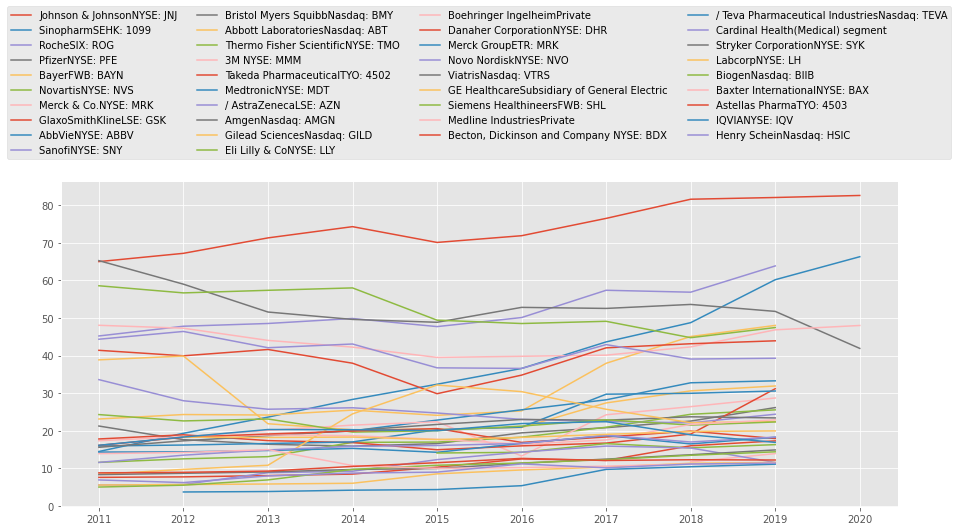

In [204]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(111)

ax1.plot(table_final2)
ax1.legend(headings_beg, loc='lower center', bbox_to_anchor=(0.5, 1.05), ncol=4)